In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

# **Критерий Шапиро-Уилка. Проверка нормальности распределения численности населения в городах России в 1959 году**

In [6]:
data = pd.read_csv('town_1959_2.csv', encoding='cp1251')
data = data.set_index('номер')
data.head()

,город,население
номер,,
1,Москва,5046.0
2,Санкт-Петербург,3003.0
3,Нижний_Новгород,941.0
4,Новосибирск,885.0
5,Самара,806.0


(array([  1.,   8.,  24., 127., 408., 302.,  88.,  33.,  11.,   2.]),
 array([-1.        , -0.52970528, -0.05941055,  0.41088417,  0.8811789 ,
         1.35147362,  1.82176835,  2.29206307,  2.7623578 ,  3.23265252,
         3.70294725]),
 <BarContainer object of 10 artists>)

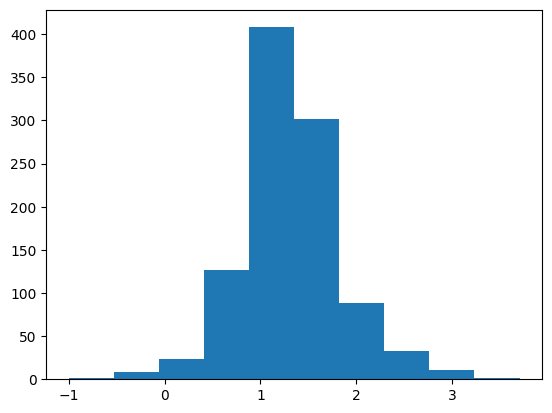

In [23]:
plt.hist(np.log10(data['население']))

Ненормальное распределение

Нормальное распределение - Критерий Шапиро-Уилка



In [43]:
shapiro = stats.shapiro(np.log10(data['население']))
shapiro[1]

3.1486824866172602e-12

p-value < 0.05, поэтому отвергаем H0

# **Критерий Стьюдента для независимых выборок. Возраст, в котором умирают европейские аристократы**

In [33]:
name=['group', 'age', 'index']
data1 = pd.read_csv('agedeath.dat.txt',sep='\s+', names=name)
data1.head()

,group,age,index
0,aris,21,1
1,aris,21,2
2,aris,21,3
3,aris,21,4
4,aris,21,5


In [45]:
x = data1[data1['group'] == 'sovr']['age']
y = data1[data1['group'] == 'aris']['age']

(array([107., 131., 162., 224., 279., 251., 171.,  92.,  17.,   6.]),
 array([ 21.,  29.,  37.,  45.,  53.,  61.,  69.,  77.,  85.,  93., 101.]),
 <BarContainer object of 10 artists>)

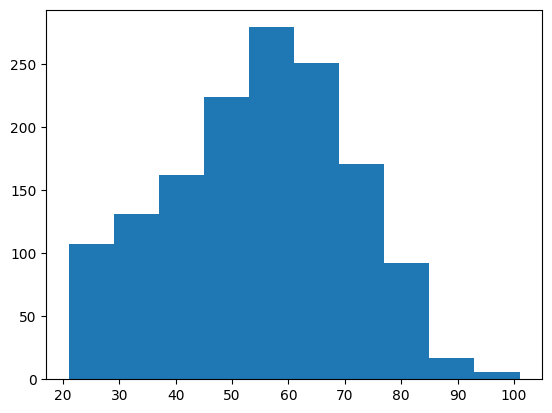

In [35]:
plt.hist(x)

(array([135., 152., 203., 285., 343., 368., 419., 263., 107.,  16.]),
 array([ 21. ,  29.1,  37.2,  45.3,  53.4,  61.5,  69.6,  77.7,  85.8,
         93.9, 102. ]),
 <BarContainer object of 10 artists>)

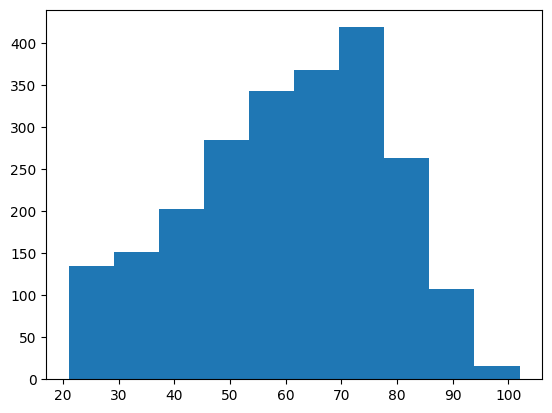

In [36]:
plt.hist(y)

Данные распределенны нормально, поэтому восользуемся критерием Флигнера-Килина

In [46]:
fligner = stats.fligner(x, y)
fligner[1]

0.00010116077103844913

p-value < 0.05, поэтому отвергаем H0  равенстве дисперсий

Так как выборка независима, воспользуемся функцией ttest_ind, чтобы проверить гипотезу о равенстве средних значений

In [47]:
ttest_ind = stats.ttest_ind(x, y, equal_var=False)
ttest_ind[1]

1.5181184197728794e-26

Также отвергаем H0

Средние значения возраста смерти европейцев разных классов различаются

# **Критерий Стьюдента для парных выборок. Скорость чтения названий цветов**

In [54]:
data2 = pd.read_csv('interference.csv')
data2.head()

,Subj,DiffCol,Black
0,1,39.64,37.53
1,2,44.26,42.02
2,3,33.84,31.99
3,4,53.88,39.48
4,5,38.94,43.09


In [55]:
x = data2['DiffCol']
y = data2['Black']

(array([ 3.,  3.,  8.,  9.,  8., 14., 12.,  3.,  5.,  5.]),
 array([29.13 , 31.872, 34.614, 37.356, 40.098, 42.84 , 45.582, 48.324,
        51.066, 53.808, 56.55 ]),
 <BarContainer object of 10 artists>)

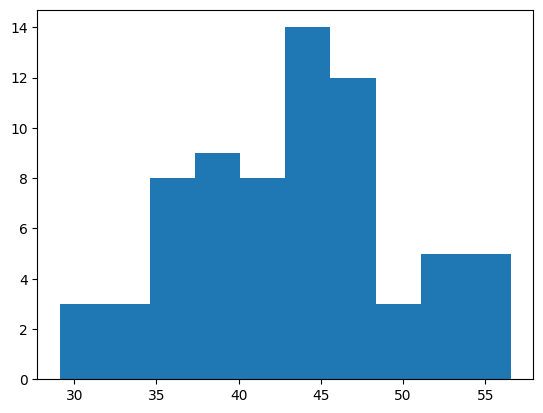

In [56]:
plt.hist(x)

(array([ 4.,  2.,  6., 10., 15., 11., 10.,  7.,  2.,  3.]),
 array([29.85 , 32.086, 34.322, 36.558, 38.794, 41.03 , 43.266, 45.502,
        47.738, 49.974, 52.21 ]),
 <BarContainer object of 10 artists>)

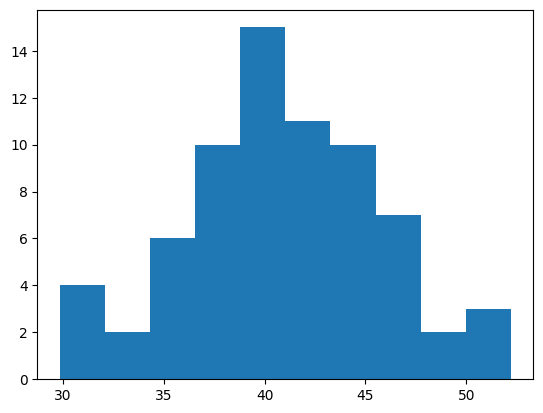

In [57]:
plt.hist(y)

Данные распределенны нормально

Так как выборка зависима, воспользуемся функцией ttest_rel

In [58]:
ttest_rel = stats.ttest_rel(x, y)
ttest_rel[1]

0.0162416779538072

Спорно

# **Критерий Манна-Уитни. Сравнение медиан цен домов в Альбукерке, расположенных на углу и не на углу улицы**

In [48]:
data3 = pd.read_csv('Albuquerque Home Prices_data.txt', sep='\t')
data3.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


In [49]:
data3 = data3.replace(-9999, np.nan)
data3.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


In [50]:
x = data3[data3['COR'] == 1]['PRICE']
y = data3[data3['COR'] == 0]['PRICE']

(array([6., 2., 3., 4., 2., 2., 2., 0., 0., 1.]),
 array([ 699. ,  798.6,  898.2,  997.8, 1097.4, 1197. , 1296.6, 1396.2,
        1495.8, 1595.4, 1695. ]),
 <BarContainer object of 10 artists>)

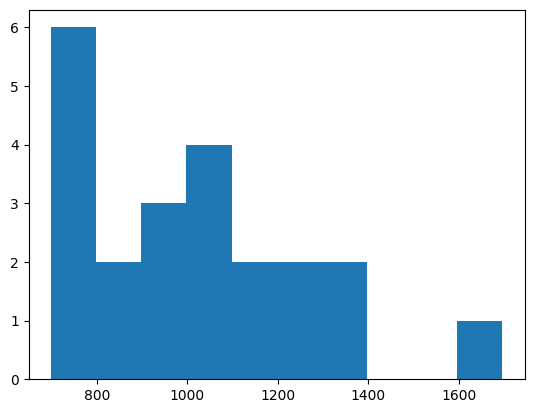

In [51]:
plt.hist(x)

(array([10., 20., 25., 15.,  7.,  4.,  4.,  1.,  2.,  7.]),
 array([ 540.,  701.,  862., 1023., 1184., 1345., 1506., 1667., 1828.,
        1989., 2150.]),
 <BarContainer object of 10 artists>)

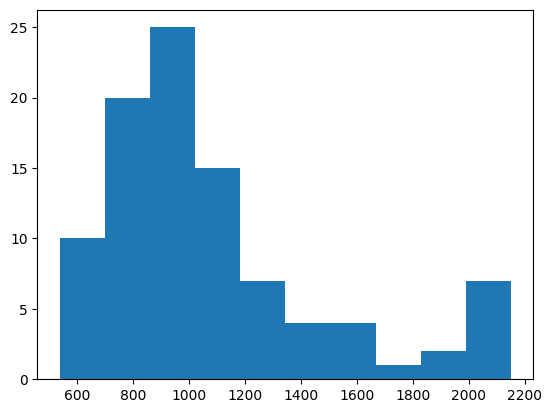

In [52]:
plt.hist(y)

Не нормальное распределение

Не парная выборка - критерий Манна-Уитни

In [53]:
mannwhitneyu = stats.mannwhitneyu(x, y)
print(mannwhitneyu)

MannwhitneyuResult(statistic=1009.0, pvalue=0.8044081572425339)


p-value > 0.05, поэтому не отвергаем гипотезу H0

Значит, цены домов имеют минимальные различия

# **Коэффициенты корреляции. Взаимосвязь цены и площади домов в Альбукерке**

In [60]:
data3 = pd.read_csv('Albuquerque Home Prices_data.txt', sep='\t')
data3 = data3.replace(-9999, np.nan)
data3.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


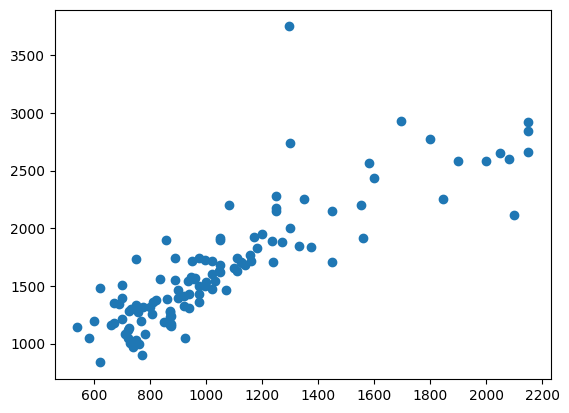

In [61]:
plt.scatter(data3['PRICE'], data3['SQFT'])

Площадь дома коррелирует с его ценой

In [62]:
pearsonr = stats.pearsonr(data3['PRICE'], data3['SQFT'])
pearsonr[1]

5.146345707628998e-33

p-value < 0,01, поэтому гипотезу H0 отвергаем

Цена зависима от площади дома

# **Одновыборочный критерий Стьюдента. Оценка способности к подавлению испульсивных поведенческих реакций**

In [69]:
name1=['Placebo', 'Methylphenidate']
data4 = pd.read_csv('ADHD.txt',sep = ' ', header = 0, names=name1)
data4.head()


,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


In [71]:
stats.ttest_1samp(data4.Placebo, 50.0)

TtestResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175, df=23)

pvalue < 0.01, поэтому отвергаем H0

Cпособоность к подавлению реакций в популяции отличается от 50